## Project 02

**Type your name here**

**DSCI 35600 - Machine Learning**


## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

Use `pandas` to load the contents of the tab-separated file `Project02_data.txt` into a dataframe called `df`. Display the first 10 rows of this dataframe.

In [8]:
df = pd.read_csv('Project02_data.txt', sep='\t')
df.head(10)

,F1,F2,F3,F4,F5,F6,y
0,-34.49,-0.168,572.572641,259.140016,P,C,2
1,-0.10,-2.595,470.205186,229.802866,Q,A,0
2,6.12,0.638,445.802367,185.265373,Q,A,3
3,12.37,1.459,548.148923,175.099249,Q,C,1
4,9.29,2.099,338.163010,123.615535,P,B,0
5,-20.64,-0.269,569.854093,130.333898,Q,A,0
6,-17.49,-0.832,739.996886,243.422914,P,C,2
7,20.53,-2.660,484.864777,172.923555,Q,C,3
8,-19.54,1.432,854.737353,77.289031,P,D,1
9,27.42,0.274,490.601855,233.826944,Q,D,2


In [9]:
list(df.columns)

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'y']

In [10]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

cols = len(object_cols)

print(cols)

Categorical variables:
['F5', 'F6']
2


Your goal in this assignment will be to use features F1 - F6 to predict one of four possible values for y: 0, 1, 2, or 3. 

## Part B: Preparing the Data

In the cell below, create the following arrays:

* `X_num` should contain the columns of `df` associated with numerical variables. 
* `X_cat` should contain the columns of `df` associated with categorical variables. 
* `y` should be a 1D array contain the values of the label, `y`. 

Print the shapes of these three arrays.

In [11]:
X_num = df.iloc[0:,[0,1,2,3]].values
X_cat = df.iloc[0:,[4,5]].values.astype('str')
y = df.iloc[0:,-1].values

print('This is X_num.shape', X_num.shape)
print('This is X_ca.shape', X_cat.shape)
print('This is y.shape', y.shape)

This is X_num.shape (1687, 4)
This is X_ca.shape (1687, 2)
This is y.shape (1687,)


#### Numerical Features
Split `Xnum` into training and validation sets called `X_num_train` and `X_num_val`. Use an 80/20 split, and set `random_state=1`. 

Then use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `X_sca_train` and `X_sca_val`. Print the shape of these two arrays. 

In [12]:
X_num_train, X_num_val, y_train, y_val = train_test_split(X_num, y, test_size=0.20, random_state=1)

scaler = StandardScaler()
X_sca_train = scaler.fit_transform(X_num_train)
X_sca_val = scaler.fit_transform(X_num_val)

print('This is X_sca_train.shape:', X_sca_train.shape)
print('This is X_sca_val.shape:', X_sca_val.shape)

This is X_sca_train.shape: (1349, 4)
This is X_sca_val.shape: (338, 4)


#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `X_enc`. 

Split `X_enc` into training and validation sets called `X_enc_train` and `X_enc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of these two arrays.

In [13]:
Encoder = OneHotEncoder(sparse=False)

X_enc = Encoder.fit_transform(X_cat)

X_enc_train, X_enc_val, y_train, y_val = train_test_split(X_enc, y, test_size=0.20, random_state=1)

print('This is X_enc_train.shape:', X_enc_train.shape)
print('This is X_enc_val.shape:', X_enc_val.shape)

This is X_enc_train.shape: (1349, 6)
This is X_enc_val.shape: (338, 6)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `X_sca_train` and `X_enc_train` into an array called `X_train`. Then combine `X_sca_val` and `X_enc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [14]:
X_train = np.hstack([X_sca_train, X_enc_train])
X_val = np.hstack([X_sca_val, X_enc_val])

print('This is X_train.shape:', X_train.shape)
print('This is X_enc_val.shape:', X_val.shape)

This is X_train.shape: (1349, 10)
This is X_enc_val.shape: (338, 10)


## Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 100 models with `C=10**k`, where `k` ranges from -4 to 0. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `k`. Label your axes, and display a legend for your plot. 

Set `solver='lbfgs'` and `multi_class='ovr'` when creating your logistic regression models. 

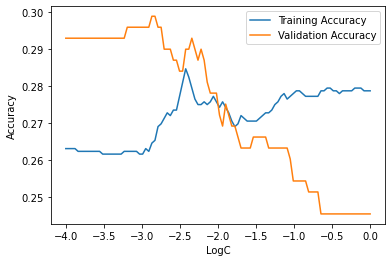

In [15]:
tr_acc = []
va_acc = []
exp_list = np.linspace(-4, 0, 100)

for k in exp_list:
    LinReg = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr')
    LinReg.fit(X_train, y_train)
    tr_acc.append(LinReg.score(X_train, y_train))
    va_acc.append(LinReg.score(X_val, y_val))

plt.figure(figsize=[6,4])
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('LogC')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result.

In [16]:
idx = np.argmax(va_acc)
k = exp_list[idx]
print('This is the k that results in the largest validation accuracy:\n', k)

This is the k that results in the largest validation accuracy:
 -2.8686868686868685


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [17]:
LinRegModel = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr')

LinRegModel.fit(X_train, y_train)

print('This is training accuracy:\n', LinRegModel.score(X_train, y_train))
print('This is validation accuracy:\n', LinRegModel.score(X_val, y_val))

This is training accuracy:
 0.26464047442550037
This is validation accuracy:
 0.2988165680473373


## Part D: K-Nearest Neighbors Model

In the cell below, create and fit several KNN models, each with a different value of `K`. In particular, consider 25 models with values of `K` ranging from 1 to 25. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `K`. Label your axes, and display a legend for your plot. 

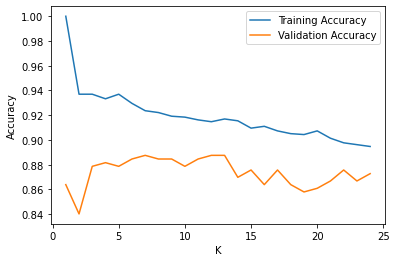

CPU times: user 1.88 s, sys: 45.8 ms, total: 1.93 s
Wall time: 1.45 s


In [18]:
%%time
tr_acc = []
va_acc = []
k_list = np.linspace(1, 24, 25).astype('int')

for k in k_list:
    KnnModel = KNeighborsClassifier(k)
    KnnModel.fit(X_train, y_train)
    tr_acc.append(KnnModel.score(X_train, y_train))
    va_acc.append(KnnModel.score(X_val, y_val))

plt.figure(figsize=[6,4])
plt.plot(k_list, tr_acc, label='Training Accuracy')
plt.plot(k_list, va_acc, label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `K` that results in the largest validation accuracy. Print this result. 

In [19]:
idx = np.argmax(va_acc)
k_val = k_list[idx]
print('This is the k that results in the largest validation accuracy:\n', k_val)

This is the k that results in the largest validation accuracy:
 7


Create a KNN model using the previously determined value of `K`. Print the training and validation accuracies for this model, clearly indicating which is which.

In [20]:
KnnModel = KNeighborsClassifier(k_val)

KnnModel.fit(X_train, y_train)

print('This is training accuracy:\n', KnnModel.score(X_train, y_train))
print('This is validation accuracy:\n', KnnModel.score(X_val, y_val))

This is training accuracy:
 0.9236471460340994
This is validation accuracy:
 0.8875739644970414


## Part E: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_dept from 1 to 30. For each model, log the training and validation accuracies in separate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

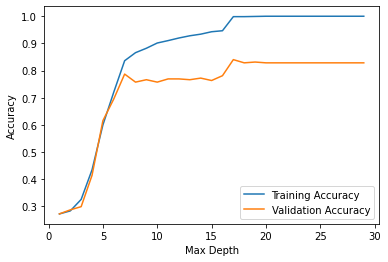

In [21]:
tr_acc = []
va_acc = []
max_depth = range(1,30)

np.random.seed(1)
for d in max_depth:
    np.random.seed(1)
    DT_model = DecisionTreeClassifier(max_depth=d)
    DT_model.fit(X_train, y_train)
    tr_acc.append(DT_model.score(X_train, y_train))
    va_acc.append(DT_model.score(X_val, y_val))
    
plt.figure(figsize=[6,4])
plt.plot(max_depth, tr_acc, label='Training Accuracy')
plt.plot(max_depth, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [22]:
idx = np.argmax(va_acc)
best_d = max_depth[idx]
print('This is the k that results in the largest validation accuracy:\n', best_d)

This is the k that results in the largest validation accuracy:
 17


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [23]:
np.random.seed(1)
DT_model = DecisionTreeClassifier(max_depth = best_d)
DT_model.fit(X_train, y_train)

print('This is training accuracy:\n', DT_model.score(X_train, y_train))
print('This is validation accuracy:\n', DT_model.score(X_val, y_val))

This is training accuracy:
 0.9985174203113417
This is validation accuracy:
 0.8402366863905325


## Part F: Random Forest Model

In the cell below, create and fit several random forest models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_dept from 1 to 30. Set `n_estimators=200` for each model. After training each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

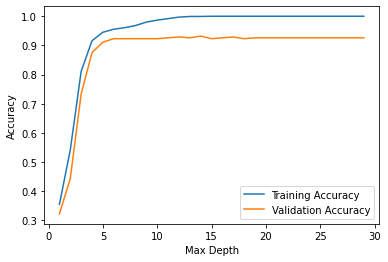

CPU times: user 13.1 s, sys: 232 ms, total: 13.3 s
Wall time: 13.5 s


In [24]:
%%time
va_acc = []
tr_acc = []
depth_list = range(1,30)

for k in depth_list:
    np.random.seed(1)
    RF_model_temp = RandomForestClassifier(n_estimators=200, max_depth=k, bootstrap=True, oob_score=True)
    RF_model_temp.fit(X_train, y_train)
    tr_acc.append(RF_model_temp.score(X_train, y_train))
    va_acc.append(RF_model_temp.score(X_val, y_val))
    
plt.figure(figsize=[6,4])
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [30]:
idx = np.argmax(va_acc)
max_depth_k = depth_list[idx]
print('This is the k that results in the largest validation accuracy:\n', max_depth_k)

This is the k that results in the largest validation accuracy:
 14


Create a random forest model using the previously determined value of `max_depth` and `n_estimators=200`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [35]:
np.random.seed(1)
RF_model = RandomForestClassifier(n_estimators=200, max_depth=max_depth_k, bootstrap=True, oob_score=True)
RF_model.fit(X_train, y_train)

print('This is training accuracy:\n', RF_model.score(X_train, y_train))
print('This is validation accuracy:\n', RF_model.score(X_val, y_val))

This is training accuracy:
 0.9992587101556709
This is validation accuracy:
 0.9319526627218935


## Part G: Summary

Print the validation accuracies for each of the four models, clearly indicating which is which. 

In [27]:
print('This is validation accuracy for Logistic Regression Model:\n', LinRegModel.score(X_val, y_val))
print()
print('This is validation accuracy for Decision Tree Model:\n', DT_model.score(X_val, y_val))
print()
print('This is validation accuracy for KNN Model:\n', KnnModel.score(X_val, y_val))
print()
print('This is validation accuracy for Random Forest Model:\n', RF_model.score(X_val, y_val) )

This is validation accuracy for Logistic Regression Model:
 0.2988165680473373

This is validation accuracy for Decision Tree Model:
 0.8402366863905325

This is validation accuracy for KNN Model:
 0.8875739644970414

This is validation accuracy for Random Forest Model:
 0.9319526627218935


## Part H:  Using GridSearchCV

From the Part G: Summary above choose the the model with the highest validation accuracy (score).   It must have come from one of the following classifiers:  LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier.   Now, you will try to improve its score by using GridSearchCV (see lecture 23) in the following way.

In the cell below, create and fit several mdels belonging to the classifier family which had the highest validation accuracy (score).  Create a range of parameters in the *param_grid* (see lecture 23) which is suitable for your classifier, use the GridSearchCV, and print out best score and the best parameters using  
*print(gscv.best_score_)*  and  *print(gscv.best_params_)*.
 


In [42]:
param_grid = [
    {'n_estimators': np.arange(100,500,100), 'max_depth':range(1, 30), 'bootstrap':['True','False'], 'oob_score':['True', 'False']}
]

RandomForest_model = RandomForestClassifier()
  
Grid_search_cv = GridSearchCV(RandomForest_model, param_grid, cv=5, scoring='accuracy', refit=True, iid=False)

Grid_search_cv.fit(X_train, y_train)

print(Grid_search_cv.best_score_)
print(Grid_search_cv.best_params_)

0.9340272614622057
{'bootstrap': 'False', 'max_depth': 15, 'n_estimators': 400, 'oob_score': 'False'}
